# Basic mathematical components

In [1]:
import pixelprism.math as pmath
import pixelprism.inspect as pinspect
import numpy as np

## Scalar

In [4]:
a = pmath.Tensor(name="a", data=np.array(1))
a

tensor(a, 1, dtype=DType.INT64, shape=())

In [5]:
b = pmath.Tensor(name="b", data=np.array(2))
b

tensor(b, 2, dtype=DType.INT64, shape=())

In [6]:
apb = a + b
apb

<MathExpr #4 add int64 () c:2>

In [7]:
apb.children

(tensor(a, 1, dtype=DType.INT64, shape=()),
 tensor(b, 2, dtype=DType.INT64, shape=()))

In [8]:
result = apb.eval()
result

np.int64(3)

In [9]:
c = pmath.Tensor(name="c", data=np.array(1), mutable=False)
c

ctensor(c, 1, dtype=DType.INT64, shape=())

In [10]:
apbpc = apb * c
apbpc

<MathExpr #6 mul int64 () c:2>

In [11]:
result = apbpc.eval()
result

np.int64(3)

In [12]:
pinspect.inspect(apbpc, backend="console")

'a + b * c\n  a + b\n    a\n    b\n  c'

In [13]:
pinspect.inspect(apbpc, backend="topological")

'n0: a + b * c -> [n1, n4] {arity=2, dtype=DType.INT64, is_leaf=False, is_node=True, mutable=None, name=a + b * c, op=mul, shape=(), type=MathExpr}\nn1: a + b -> [n2, n3] {arity=2, dtype=DType.INT64, is_leaf=False, is_node=True, mutable=None, name=a + b, op=add, shape=(), type=MathExpr}\nn2: a -> [-] {arity=0, dtype=DType.INT64, is_leaf=True, is_node=False, mutable=True, name=a, shape=(), type=Tensor}\nn3: b -> [-] {arity=0, dtype=DType.INT64, is_leaf=True, is_node=False, mutable=True, name=b, shape=(), type=Tensor}\nn4: c -> [-] {arity=0, dtype=DType.INT64, is_leaf=True, is_node=False, mutable=False, name=c, shape=(), type=Tensor}'

In [14]:
pinspect.inspect(apbpc, backend="sexpr")

'(a + b * c (a + b a b) c)'

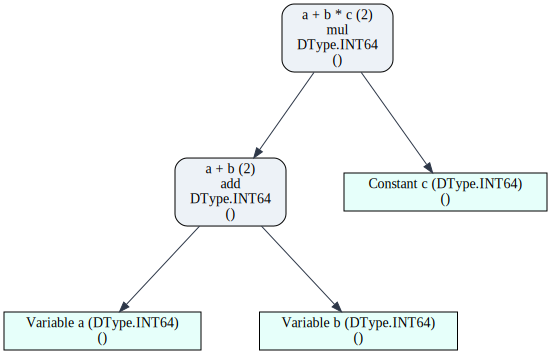

In [15]:
pinspect.inspect(apbpc, backend="graphviz")

In [16]:
from pixelprism.math.render.latex import to_latex
to_latex(apbpc)

'\\left(1 + 2\\right) \\cdot 1'

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./tmp_latex/equation.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cls
Document Class: standalone 2022/10/10 v1.3b Class to compile TeX sub-files stan
dalone
(/usr/share/texlive/texmf-dist/tex/latex/tools/shellesc.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifluatex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/xkeyval/xkeyval.sty
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkeyval.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkvutils.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/keyval.tex))))
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 

pre-processing DVI file (format version 2)
processing page 1
  computing extents based on data set by preview package (version 13.2)
  width=42.222111pt, height=10pt, depth=0pt
  graphic size: 42.222111pt x 10pt (14.839375mm x 3.514598mm)
  output written to latex_image.svg
1 of 1 page converted in 0.149019 seconds


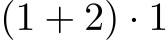

In [17]:
from pixelprism.math.render import render_latex
latex_image = render_latex(apbpc, output_path="latex_image.svg")
latex_image